In [75]:
import matplotlib.pyplot as plt
import numpy as np
import MIME_correction

In [76]:
def get_pool_data(first_round_targets : str, second_round_targets : str):
    path = "/datadisk/MIME/short_seq_high_depth/"
    ground_truth = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/ground_truth.csv", delimiter=",")
    round_1 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/effects.csv", delimiter=",")
    round_2 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/effects.csv", delimiter=",")

    path_unbound_pairwise_counts_r1 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/non_selected/pairwise_count.csv"
    path_unbound_pairwise_counts_r2 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/non_selected/pairwise_count.csv"
    path_bound_pairwise_counts_r1 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/selected/pairwise_count.csv"
    path_bound_pairwise_counts_r2 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/selected/pairwise_count.csv"

    frequency_matrix_r1 = MIME_correction.construct_frequency_matrix(path_unbound_pairwise_counts_r1, path_bound_pairwise_counts_r1)
    frequency_matrix_r2 = MIME_correction.construct_frequency_matrix(path_unbound_pairwise_counts_r2, path_bound_pairwise_counts_r2)

    corrected_round_1 = np.linalg.solve(frequency_matrix_r1, round_1)
    corrected_round_2 = np.linalg.solve(frequency_matrix_r2, round_2)

    return ground_truth, round_1, round_2, corrected_round_1, corrected_round_2

In [77]:
ground_truths = []
round_1s = []
round_2s = []
corrected_round_1s = []
corrected_round_2s = []

for first_round_targets in ["0.1", "1", "10"]:
    for second_round_targets in ["0.1", "1", "10"]:
        ground_truth, round_1, round_2, corrected_round_1, corrected_round_2 = get_pool_data(first_round_targets, second_round_targets)
        ground_truths.append(ground_truth)
        round_1s.append(round_1)
        round_2s.append(round_2)
        corrected_round_1s.append(corrected_round_1)
        corrected_round_2s.append(corrected_round_2)
        
        

frequency matrix
(9, 9)
matrix is full rank
condition number of matrix:  1.00269315832332
[[ 1.  0.  0.  0. -0.  0. -0.  0.  0.]
 [ 0.  1.  0. -0. -0. -0.  0. -0. -0.]
 [ 0.  0.  1. -0. -0.  0. -0.  0.  0.]
 [ 0. -0. -0.  1.  0.  0.  0.  0.  0.]
 [-0. -0. -0.  0.  1.  0. -0.  0.  0.]
 [ 0. -0. -0.  0.  0.  1.  0.  0.  0.]
 [-0.  0. -0.  0. -0.  0.  1.  0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0. -0.  0.  0.  0.  0.  0.  0.  1.]]
frequency matrix
(9, 9)
matrix is full rank
condition number of matrix:  1.0038252042410878
[[ 1.  0.  0. -0.  0.  0. -0.  0.  0.]
 [ 0.  1.  0.  0. -0. -0. -0.  0. -0.]
 [ 0.  0.  1.  0.  0. -0. -0.  0. -0.]
 [-0.  0.  0.  1.  0.  0.  0. -0.  0.]
 [ 0. -0.  0.  0.  1.  0. -0. -0.  0.]
 [ 0. -0.  0.  0.  0.  1.  0. -0. -0.]
 [-0.  0. -0.  0. -0.  0.  1.  0.  0.]
 [ 0. -0.  0.  0. -0.  0.  0.  1.  0.]
 [ 0. -0. -0.  0.  0. -0.  0.  0.  1.]]
frequency matrix
(9, 9)
matrix is full rank
condition number of matrix:  1.0023107687139141
[[ 1.  0.  0. -0.  0. 

squared error for inferred Kds
0.001
0.013
0.007
squared error for corrected Kds
0.001
0.013
0.007
difference between squared error for inferred Kds and corrected Kds
0.0
0.0
0.0


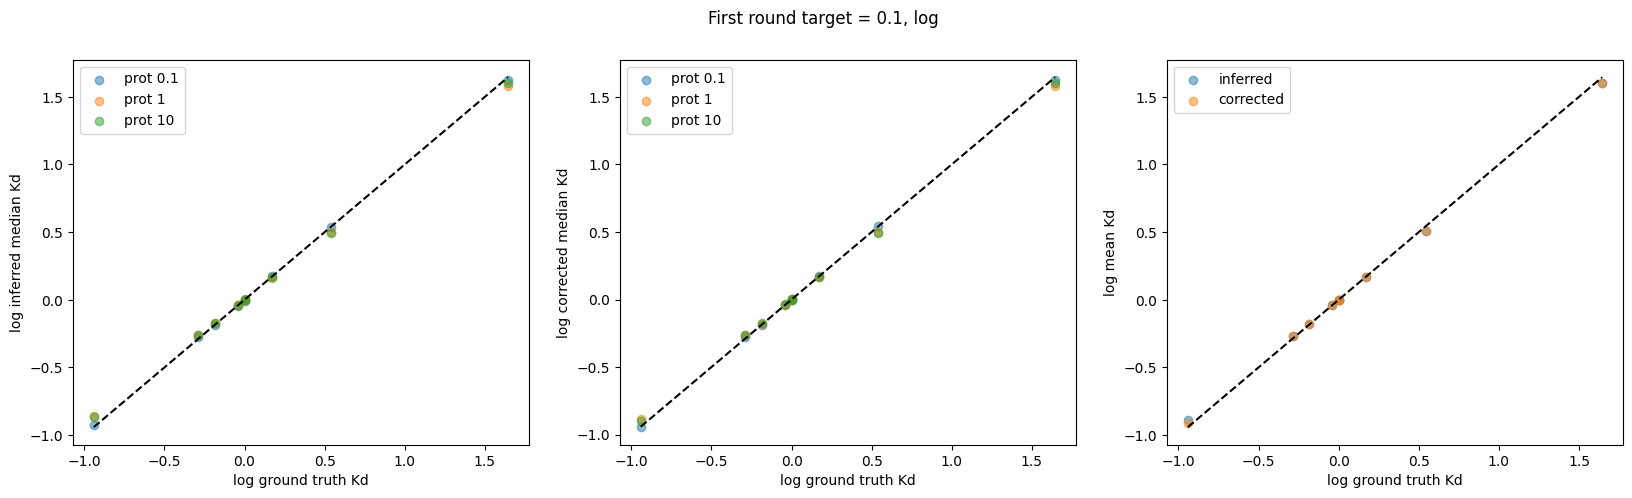

squared error for mean of inferred Kds and corrected Kds
0.006
0.006
difference between squared error for mean of inferred Kds and corrected Kds
0.0


In [78]:
MIME_correction.comparison_plot(ground_truths[0],round_2s[0],round_2s[1],round_2s[2],corrected_round_2s[0],corrected_round_2s[1],corrected_round_2s[2], "First round target = 0.1")

squared error for inferred Kds
0.002
0.013
0.009
squared error for corrected Kds
0.002
0.012
0.008
difference between squared error for inferred Kds and corrected Kds
-0.0
0.001
0.001


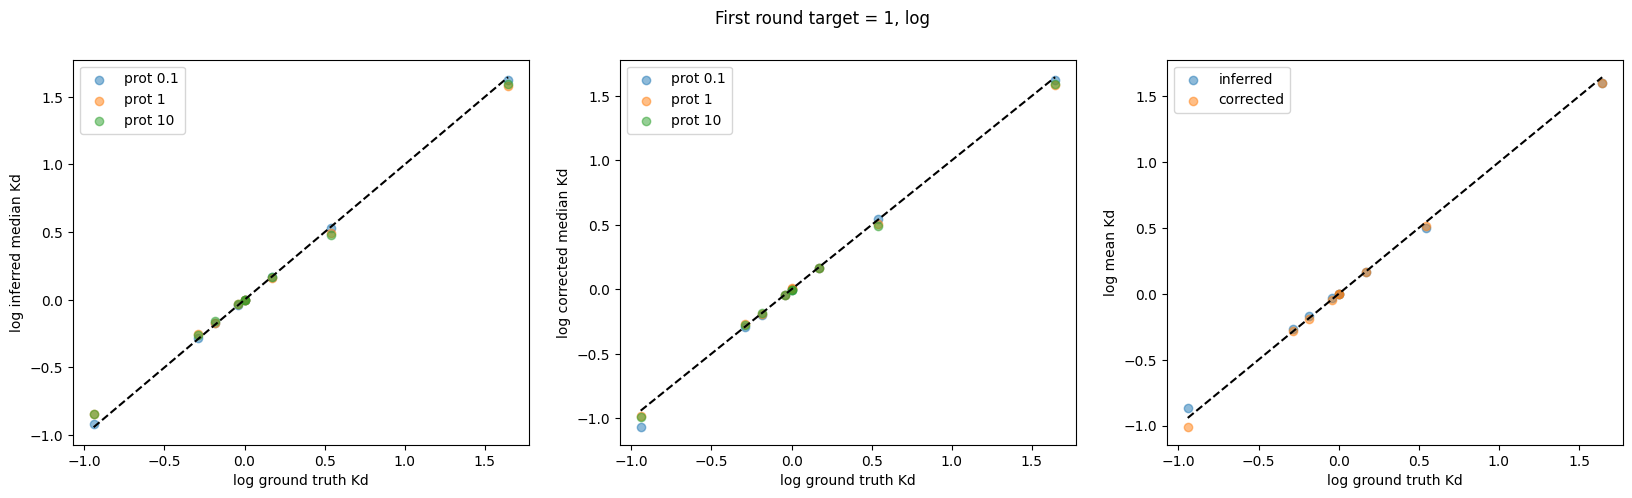

squared error for mean of inferred Kds and corrected Kds
0.007
0.006
difference between squared error for mean of inferred Kds and corrected Kds
0.001


In [79]:
MIME_correction.comparison_plot(ground_truths[3],round_2s[3],round_2s[4],round_2s[5],corrected_round_2s[3],corrected_round_2s[4],corrected_round_2s[5], "First round target = 1")

squared error for inferred Kds
0.003
0.016
0.009
squared error for corrected Kds
0.002
0.014
0.007
difference between squared error for inferred Kds and corrected Kds
0.0
0.002
0.002


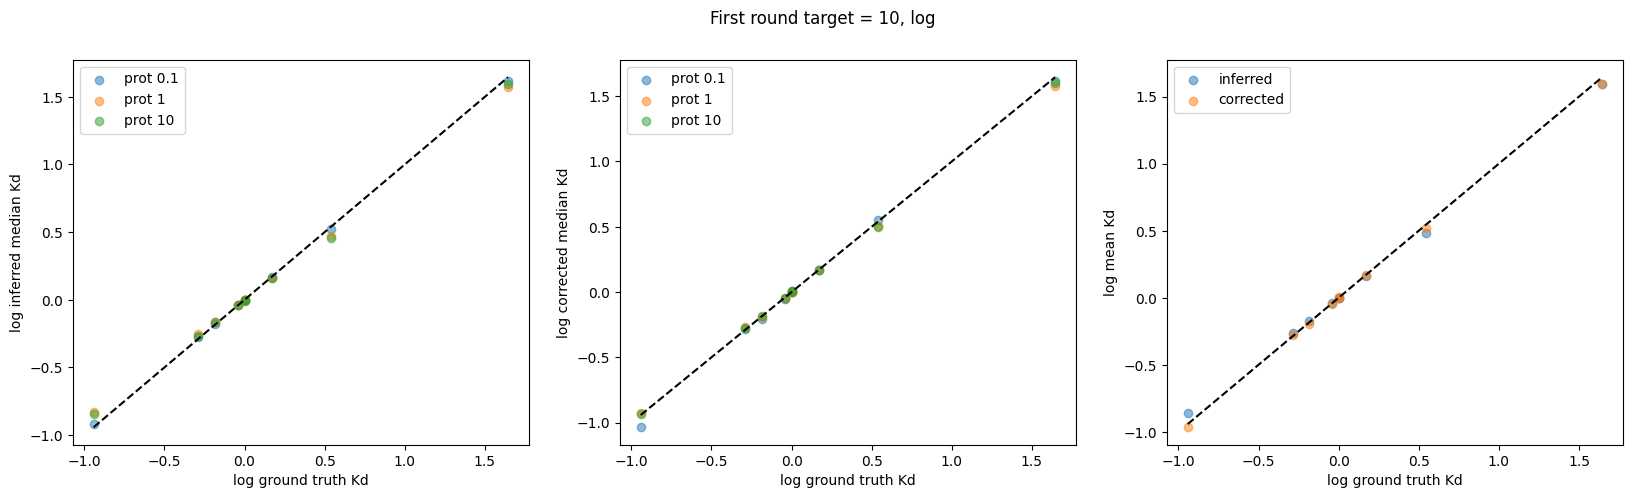

squared error for mean of inferred Kds and corrected Kds
0.008
0.007
difference between squared error for mean of inferred Kds and corrected Kds
0.002


In [80]:
MIME_correction.comparison_plot(ground_truths[6],round_2s[6],round_2s[7],round_2s[8],corrected_round_2s[6],corrected_round_2s[7],corrected_round_2s[8], "First round target = 10")

squared error for inferred Kds
0.007
0.007
0.007
squared error for corrected Kds
0.006
0.006
0.006
difference between squared error for inferred Kds and corrected Kds
0.001
0.001
0.001


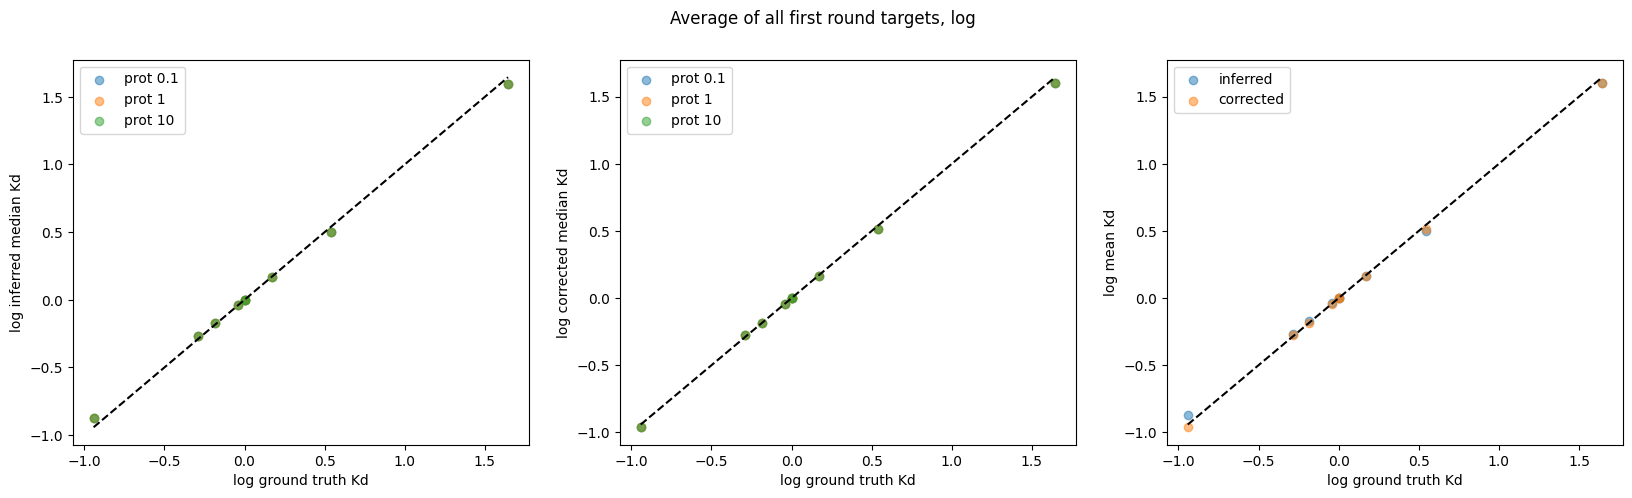

squared error for mean of inferred Kds and corrected Kds
0.007
0.006
difference between squared error for mean of inferred Kds and corrected Kds
0.001


In [81]:
# plot the average of the three rounds vs the ground truth
average_round_2 = np.mean(round_2s, axis=0)
average_corrected_round_2 = np.mean(corrected_round_2s, axis=0)

MIME_correction.comparison_plot(ground_truths[0],average_round_2,average_round_2,average_round_2,average_corrected_round_2,average_corrected_round_2,average_corrected_round_2, "Average of all first round targets")
